# TELCO CUSTOMER CHURN : EDA

### Data Source : [click here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) 

<br>

**Customer churn** is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention. it can also be identified as to the **loss** of **customers**. <br><br>

Here, we will try to investigate the data and analyze a few things: <br>

1.   What are the key indicators to predict **Customer** churn?
2.   What is **Customer** most favorites add-ons?
3.   How long is **Customer** usually stayed with the Company? 




In [ ]:
#import the library

import pandas as pd # for data processing 
import numpy as np # for array, and linear algebra
import seaborn as sns # to visualize data
import matplotlib.pyplot as plt # to create stat and visuaize data

In [ ]:
# read the data

df = pd.read_csv('/content/Telco-Customer-Churn.csv')

###Initial Exploration

In [ ]:
# Look at the columns and first 5 rows of data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Let's check data type from the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Dataframe Explanation:


|         Item         |                Description                |
|----------------------|-------------------------------------------|
| customerID           | Customer identification code <br>
| gender               | Gender of the customer [male/female]      
| SeniorCitizen        | Whether the customer is a senior citizen or not [0/1]
| Partner              | Whether the customer has partner or not [Yes/No]
| Dependents           | Whether the customer has dependents or not [Yes/No]
| tenure               | Number of months the customer has been with the company
| PhoneService         | Whether the customer has phone service or not [Yes/No]
| MultipleLines        | Whether the customer has multiple lines service or not [Yes/No/No phone service]
| InternetService      | Type of internet service used by customer [DSL/ Fiber optic/No]
| OnlineSecurity       | Whether the customer has online security service or not [Yes/No/No InternetService]
| OnlineBackup         | Whether the customer has online backup service or not [Yes/No/No InternetService]
| DeviceProtection     | Whether the customer has device protection or not [Yes/No/No InternetService]
| TechSupport          | Whether the customer has technical support or not [Yes/No/No InternetService]
| StreamingTV          | Whether the customer has TV Streaming service or not [Yes/No/No InternetService]
| StreamingMovies      | Whether the customer has Movies service or not [Yes/No/No InternetService]
| Contract             | Contract duration between customer and the company  [Month-to-month/One year/Two year]
| PaperlessBilling     | Whether the customer using paperless billing or not [Yes/No]
| PaymentMethod        | Method of payment used by customer [Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)]
| MonthlyCharges       | Monthly amount of charges to the customer
| TotalCharges         | Total amount of charges to the customer
| **Churn**            | Wheter the customer **churn** or not [Yes/No]

<br>
There are no null values in each columns, but we have couple of things to look. <br>

First we need to convert  **SeniorCitizen** to string because it is [1,0] binary string. Second, we convert **TotalCharges** from string or object to Float.

In [ ]:
# Convert column **SeniorCitizen** from **integer** to **string**

df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [ ]:
# Convert column **TotalCharges** from **string** to **float**

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# Now, Let's check the results!

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [ ]:
# Check if the dataframe contain null value

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Apparently, column **TotalCharges** has 11 null values. Because it is less than **1%**, we can drop it.

In [ ]:
# Drop null values

df = df.dropna()

In [ ]:
# Let's check it once more!

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check if there is any duplicated values

df.duplicated().sum()

0

Because there is no duplicated values in dataframe, we can move forward.

In [ ]:
# Let's do Descriptive Statistics with the dataframe

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


As far as we can see, there are 3 numericals columns, and the mean value of each column is > than median by less than **1%**, so we can ignore it, and consider it **acceptable**. <br>

In [ ]:
# Find out unique values

df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Now, let's separate the categoricals and numericals columns. Here, we create new dataframe, each for **numerical** and **categorical**.

In [ ]:
# creating numerical dataframe : df_numericals

df_numericals = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
df_numericals.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
# creating categorical dataframe : df_categoricals, by dropping **MontlyCharges** and **TotalCharges** columns

df_categoricals = df.drop(labels = ['tenure','MonthlyCharges','TotalCharges'], axis = 1)
df_categoricals.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
df_categoricals.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Next, we encoding the **Categoricals** data, to ease the computation for analyzing process and convert all the in features to numbers.

In [ ]:
# Encoding the df_categoricals

from sklearn.preprocessing import LabelEncoder
col = list(df_categoricals)
df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)
df_categoricals.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5365,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3953,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2558,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5524,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6500,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


##Visualizing The Data

First, let's check, if **tenure** affect the customer to **Churn**?

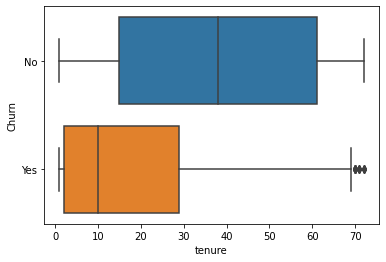

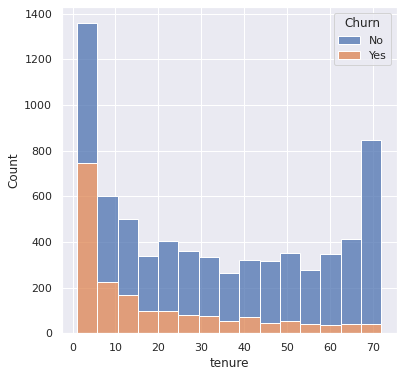

In [ ]:
# Check if Tenure affect the Churn or not?

sns.boxplot(data=df, x="tenure", y="Churn")
plt.show()

sns.set(rc={'figure.figsize':(6,6)})
plt.show()

sns.histplot(data = df,x= "tenure",hue = 'Churn',multiple='stack')

Obervation:
There is a few outliers from the above boxplot graphic, but we can ignore it because it is not that extreme. <br>
From above graphic, we can also see, customer with shortest periode of tenure, tends to **churn** more than customer who stayed longer with the company. <br>
It can be probably caused by customer with longest period of tenure, already felt comfortable with the services, and decide to stay.

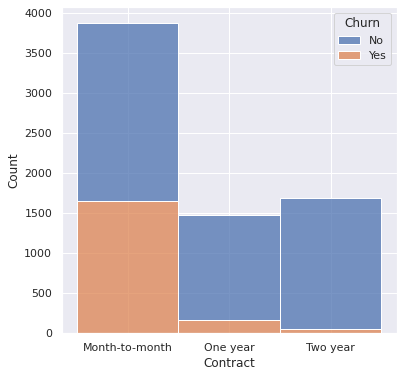

In [ ]:
# Check if Contract affect the Customer to Churn

sns.histplot(data = df,x= "Contract",hue = 'Churn',multiple='stack')
plt.show()

**Obervation:** <br>
Customer with shortest **Contract** period, tend to **churn**, than customer with longest **Contract** period. Because, usually they just want to try it for a few months, or maybe just one month, and then they **churn**. <br>

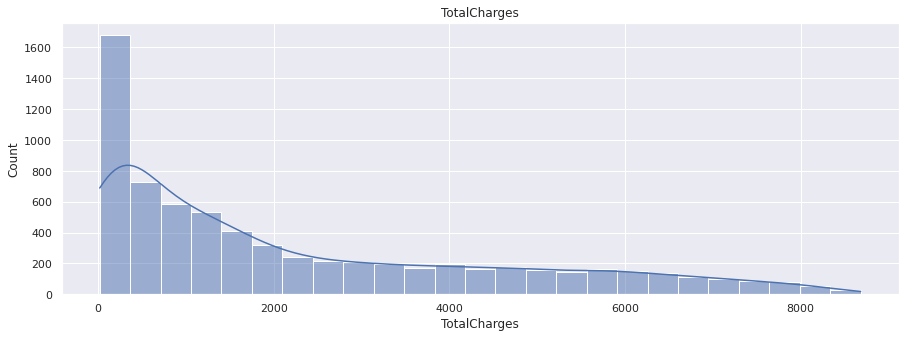

In [ ]:
# Distribution for Total Charges

plt.figure(figsize=(15, 5))
sns.histplot(data = df_numericals['TotalCharges'], kde =True)
plt.title('TotalCharges')
plt.show()

From above chart, we can see that Distribution for **TotalCharges** is lean to the right, or as we can say is positive skew, which mean the customers who has a low charges are way much more than customer with big charges.

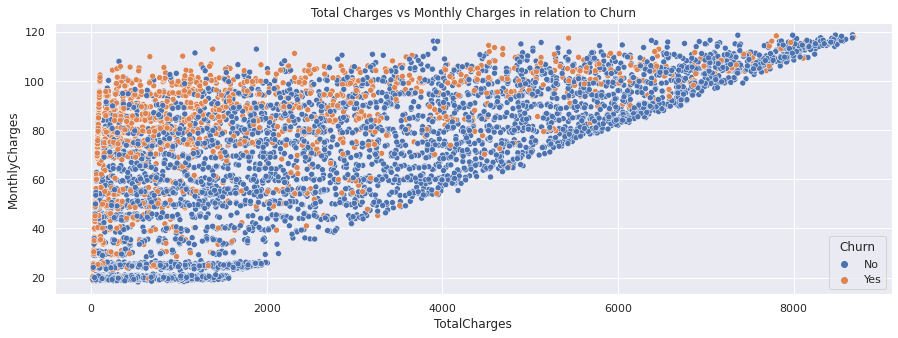

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = df_numericals['TotalCharges'],y = df_numericals['MonthlyCharges'], hue=df['Churn'])
plt.title('Total Charges vs Monthly Charges in relation to Churn')
plt.show()

Plotting the **MonthlyCharges** against the **TotalCharges** with **Churn**, we find that most people has tendency to **churn** with lower charges, because they are only using the services for awhile or, without much add-ons. Customer with highest charge rate tends to not **Churn**.

## Correlation

In [ ]:
# Here we combined the encoded df_categoricals, and df_numericals

df_update = pd.concat([df_categoricals, df_numericals], axis=1, join='inner')

corr = df_update.corr()
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,-0.006987,0.004497,-0.012335,0.013740,-0.002960,...,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.017858,0.007209,-0.004445,-0.000263
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,...,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.008545,0.005285,-0.013779,0.000048
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,...,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.150541,0.015683,0.219874,0.102411
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,...,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,-0.149982,0.381912,0.097825,0.319072
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,...,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.163128,0.163386,-0.112343,0.064653
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,...,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.011691,0.007877,0.248033,0.113008
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,...,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.038043,0.343673,0.433905,0.453202
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,...,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.047097,-0.029835,-0.322173,-0.175691
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,-0.014163,0.007306,-0.028003,1.000000,0.184942,...,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.289050,0.327283,-0.053576,0.254473
OnlineBackup,-0.002960,-0.011920,-0.013355,0.153045,0.090231,0.024040,0.117276,0.036735,0.184942,1.000000,...,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,-0.195290,0.372434,0.119943,0.375556


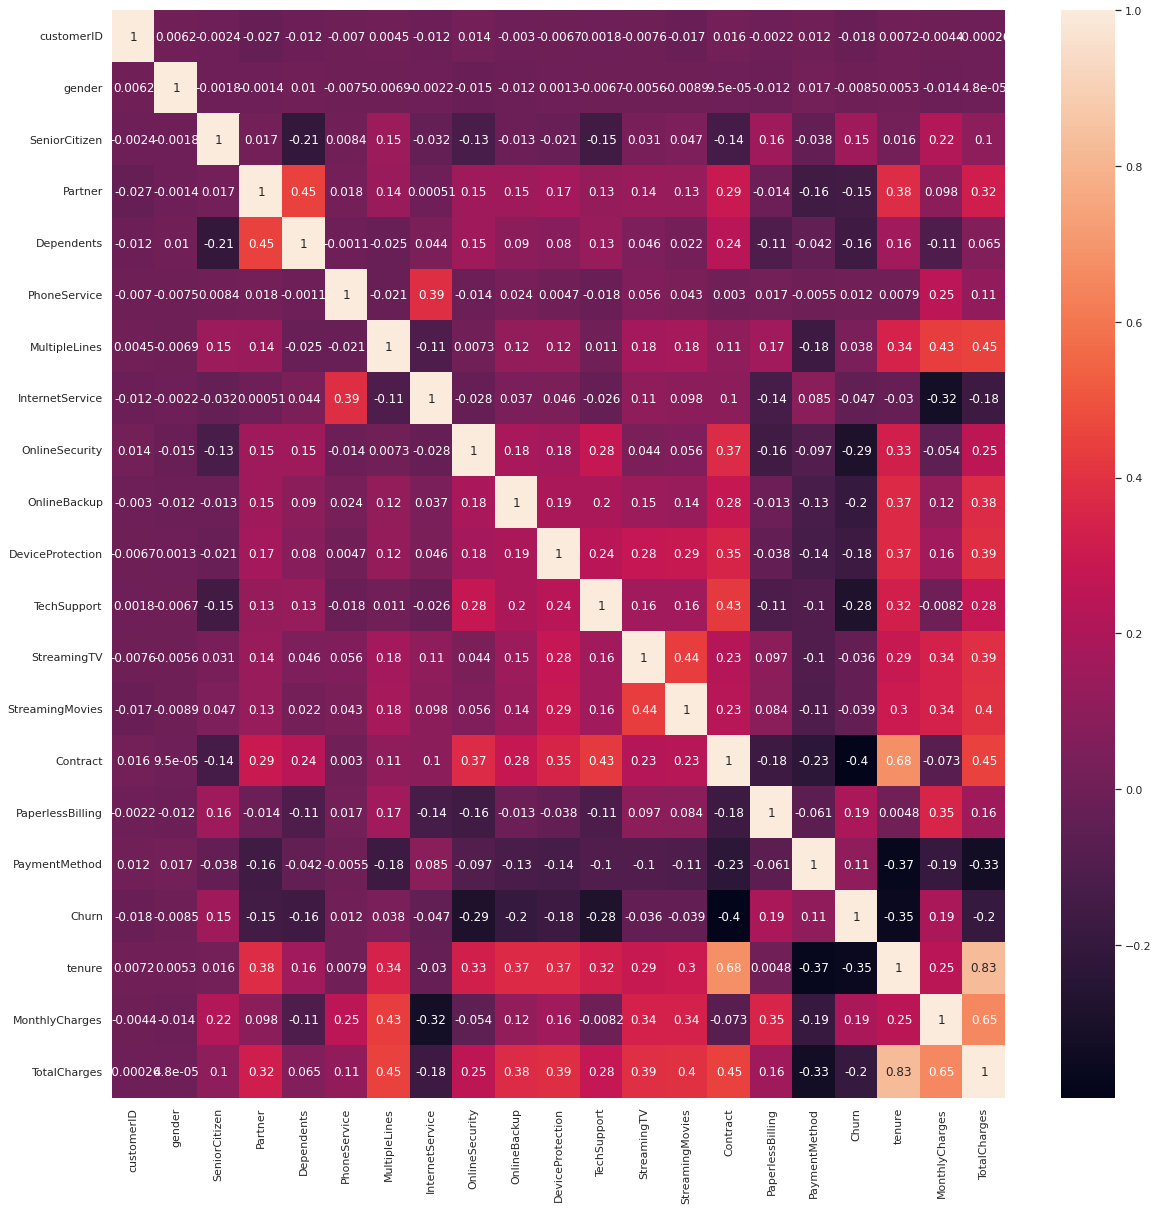

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True)

From the **heatmap** we can see that: <br>

1.   Value from **TotalCharges** is highly correlated with duration of Customer **tenure** with score 0,83
2.   Value from **TotalCharges** also correlated with the value of **MonthlyCharges**
3.   **tenure** duration is highly correlated with **Contract** duration
4.   Add-ons that connected to internet service, are moderatedly correlated with each others
5.   But, none of the column has meaningful correlation with **Churn** 



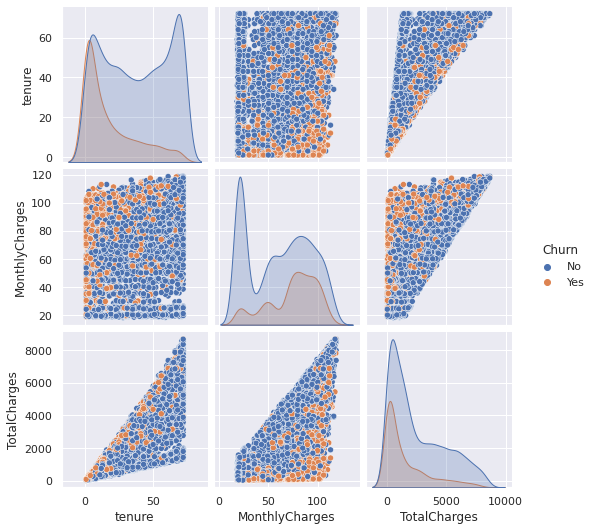

In [ ]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

Next, we want to see the **TOP 5** add-ons, installed by customers

In [ ]:
# count the value from unique item of PhoneService

df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
# count the value from unique item of MultipleLines

df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
# count the value of unique item from OnlineSecurity

df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
# count the value of unique item from OnlineBackup

df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [ ]:
# count the value of unique item from DeviceProtection

df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [ ]:
# count the value of unique item from TechSupport

df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
# count the value of unique item from StreamingTV

df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
# count the value of unique item from StreamingMovies

df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [ ]:
# Create new dataframe of add-ons, based on above values

data = {'add-on': ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV', 'StreamingMovies'],
        'Yes': [6352, 2967, 2015, 2425, 2418, 2040, 2703, 2731],
        'No' : [680, 3385, 3497, 3087, 3094, 3472, 2809, 2781],
        'Other' : [0, 680, 1520, 1520, 1520, 1520, 1520, 1520]}

df_update = pd.DataFrame(data)

df_update

,add-on,Yes,No,Other
0,PhoneService,6352,680,0
1,MultipleLines,2967,3385,680
2,OnlineSecurity,2015,3497,1520
3,OnlineBackup,2425,3087,1520
4,DeviceProtection,2418,3094,1520
5,TechSupport,2040,3472,1520
6,StreamingTV,2703,2809,1520
7,StreamingMovies,2731,2781,1520


In [ ]:
# Find info from new dataframe

df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   add-on  8 non-null      object
 1   Yes     8 non-null      int64 
 2   No      8 non-null      int64 
 3   Other   8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 384.0+ bytes


In [ ]:
# Sort add-ons from highest to low

top_addon = (df_update
            .groupby('add-on')
            .agg(Total_Customer=('Yes','sum'))
            .reset_index()
            .sort_values('Total_Customer',ascending=False)
            )

top_addon

,add-on,Total_Customer
4,PhoneService,6352
1,MultipleLines,2967
5,StreamingMovies,2731
6,StreamingTV,2703
2,OnlineBackup,2425
0,DeviceProtection,2418
7,TechSupport,2040
3,OnlineSecurity,2015


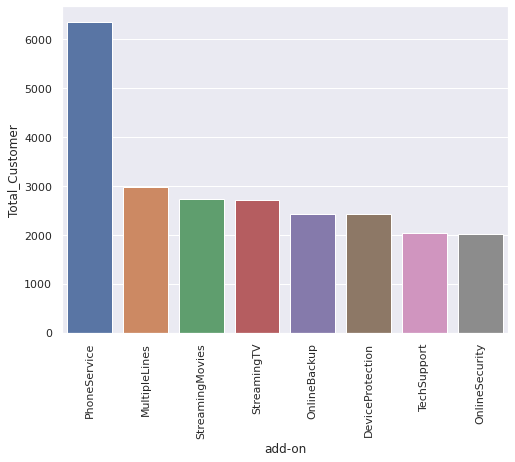

In [ ]:
# Visualize the dataframe

plt.figure(figsize=(8,6))
sns.barplot(data=top_addon, x='add-on', y='Total_Customer')
plt.xticks(rotation=90)
plt.show()

Based on the graph, **TOP 5** add-ons are **PhoneService**, **MultipleLines**, **StreamingMovies**, **StreamingTV**, and **OnlineBackup**.

Next, we want to see the what is customer most favorite **PaymenMethod**

In [ ]:
# count the value of unique item from PaymentMethod

df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
# Sort values of PaymentMethod from most favorite to least favorite

top_payment= (df
            .groupby('PaymentMethod')
            .agg(Total_Customer=('PaymentMethod','count'))
            .reset_index()
            .sort_values('Total_Customer',ascending=False)
            )

top_payment

,PaymentMethod,Total_Customer
2,Electronic check,2365
3,Mailed check,1604
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521


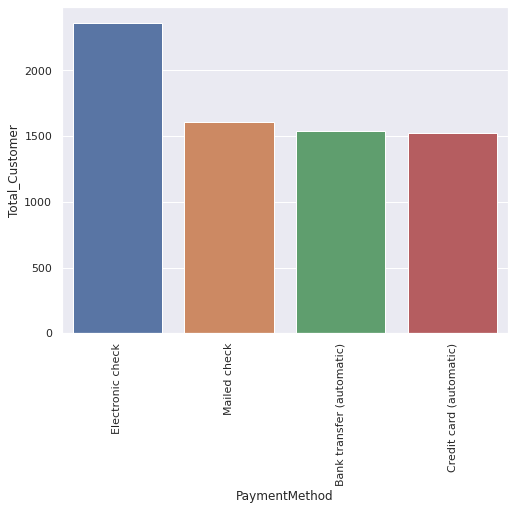

In [ ]:
# Visualize the top_payment data

plt.figure(figsize=(8,6))
sns.barplot(data=top_payment, x='PaymentMethod', y='Total_Customer')
plt.xticks(rotation=90)
plt.show()

About **33%** of Customer [2365 of 7032], prefer **Electronic Check** to do the payment. Because it's easiest, more secured and fast.

## CONCLUSION

Even though **Churn** did not really correlated or affected by other columns. But, based on our analysist, **tenure** period and **Contract** period can be used as predictive movements, on whether customer will **churn** or **not**. Customer with longest period of **tenure** and **contract**, tends to not **churn** and stay with the **services**. <br><br>

There are **Top 5** add-ons or services that Customers prefer to has:


1.   Phone Services
2.   Multiple Lines
3.   Streaming Movies
4.   Streaming TV
5.   Online Backup

Last but not least, almost 33% customers, prefer to used **Electronic Check** as their **Payment Method**



